<a href="https://colab.research.google.com/github/Summit2/ML_education/blob/main/Comparison_of_GD_methods_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm.autonotebook import tqdm, trange

<ipython-input-3-a486a786c1f7>:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
data_transforms = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5),(0.5))

    ]

)

In [5]:
root = './'
train_dataset = MNIST(root, transform=data_transforms, download = True)
val_dataset = MNIST(root, transform=data_transforms,download = True)

train_dataloader = DataLoader(train_dataset, batch_size = 128, shuffle=True)
val_dataloader =  DataLoader(val_dataset, batch_size = 128)

loaders = {'train' : train_dataloader,
           'valid' : val_dataloader }

100%|██████████| 9912422/9912422 [00:00<00:00, 122123461.53it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97768921.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33921382.17it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3664267.89it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [6]:

class LeNet (nn.Module):
  def __init__(self):
      super(LeNet, self).__init__()

      self.conv1 = nn.Conv2d(1,6,3)

      self.pool1 = nn.MaxPool2d(2)
      self.conv2 = nn.Conv2d(6,16,3)


      self.fc1 = nn.Linear(1936,120)

      self.fc2 = nn.Linear(120,84)

      self.fc3 = nn.Linear(84,10)

      self.activation = nn.ReLU(inplace=True)

  def forward(self,x):
      x = self.activation(self.conv1(x))
      # print(x)
      x = self.pool1(x)
      x = self.activation(self.conv2(x))

      x = torch.flatten(x, start_dim = 1)
      x = self.activation(self.fc1(x))
      x = self.activation(self.fc2(x))
      x = self.fc3(x)

      return x



In [7]:
LeNet()
# train_loop(optimizer)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (activation): ReLU(inplace=True)
)

In [15]:
def train_loop(model, optim):

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  model = model
  model = model.to(device)

  criterion = torch.nn.CrossEntropyLoss()


  max_epochs = 10
  accuracy = {"train": [], "valid": []}



  for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
      epoch_correct = 0
      epoch_all = 0
      for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device) ,y_batch.to(device)
        # print(type(x_batch))

        if k == "train":

            model.train()
            optimizer.zero_grad()
            # print((x_batch).size())
            outp = model(x_batch)

            loss = criterion(outp, y_batch)
            loss.backward()
            optimizer.step()


        elif k == "valid":
          model.eval()
          with torch.no_grad():
            outp = model(x_batch)

        #посчитаем accuracy
        predictions = outp.argmax(-1)
        # print(predictions)


        all = 128
        correct = (predictions.cpu().detach().numpy() == y_batch.cpu().detach().numpy()).sum()

        epoch_all +=all
        epoch_correct+=correct
        # print(k,epoch_correct)

        # print(correct_answers)
      if k == 'train':

          print(f"Epoch {epoch+1}")

      print(f"State: {k}  Accuracy = {epoch_correct/epoch_all}")
      accuracy[k].append(epoch_correct/epoch_all)
  return accuracy


In [16]:
model = LeNet()
# for name, param in model.named_parameters():
#    print(name, param)
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)
SGD_accuracy = train_loop(model,optimizer)


conv1.weight Parameter containing:
tensor([[[[-0.2844,  0.2072,  0.1900],
          [ 0.3049, -0.3291,  0.1234],
          [-0.0035, -0.0803,  0.0314]]],


        [[[ 0.2911, -0.2837,  0.0480],
          [ 0.0278,  0.1273, -0.1074],
          [-0.1953, -0.0744,  0.2939]]],


        [[[-0.2260,  0.2642, -0.0175],
          [ 0.1371,  0.0507, -0.0765],
          [ 0.2667, -0.2095, -0.3179]]],


        [[[-0.1549, -0.1173,  0.1673],
          [ 0.0546, -0.2977, -0.0605],
          [-0.2482, -0.1794, -0.0787]]],


        [[[ 0.1877, -0.0910, -0.1889],
          [-0.0719,  0.0385, -0.2916],
          [-0.3270, -0.0934,  0.2713]]],


        [[[ 0.0501,  0.0727,  0.1114],
          [-0.1307,  0.1023,  0.0586],
          [-0.1469, -0.1926, -0.1377]]]], requires_grad=True)
conv1.bias Parameter containing:
tensor([ 0.1037,  0.0619, -0.1329,  0.1694,  0.2794,  0.3276],
       requires_grad=True)
conv2.weight Parameter containing:
tensor([[[[-0.0989, -0.0847, -0.0279],
          [-0.0080,  0.

In [18]:
model = LeNet().to('cuda')
# for name, param in model.named_parameters():
#    print(name, param)
optimizer = torch.optim.Adagrad(params = model.parameters())
Adagrad_accuracy = train_loop(model,optimizer)

conv1.weight Parameter containing:
tensor([[[[-0.0373, -0.1975,  0.2354],
          [ 0.1337, -0.1941,  0.1490],
          [-0.0813,  0.1984, -0.0920]]],


        [[[ 0.1230,  0.0475,  0.0106],
          [ 0.2000, -0.2828, -0.3187],
          [-0.1156,  0.1715, -0.1864]]],


        [[[-0.0405, -0.1278,  0.1480],
          [-0.2319, -0.0994, -0.1392],
          [ 0.1398, -0.3069,  0.2850]]],


        [[[ 0.0878,  0.2042, -0.2033],
          [ 0.0701, -0.0346, -0.0606],
          [-0.0065, -0.0288,  0.2276]]],


        [[[-0.2911,  0.2805, -0.0202],
          [-0.2077,  0.2612, -0.1867],
          [ 0.3161,  0.1475,  0.2913]]],


        [[[ 0.2403, -0.0923, -0.3009],
          [-0.1974, -0.3114, -0.0184],
          [-0.0635, -0.1903,  0.3038]]]], device='cuda:0', requires_grad=True)
conv1.bias Parameter containing:
tensor([0.1236, 0.0197, 0.0602, 0.1059, 0.0211, 0.1291], device='cuda:0',
       requires_grad=True)
conv2.weight Parameter containing:
tensor([[[[-2.0897e-03,  9.5822e-0

In [19]:
for name, param in model.named_parameters():
   print(name, param)

conv1.weight Parameter containing:
tensor([[[[-2.2251e-01, -3.4418e-01,  3.9422e-01],
          [-6.7526e-02, -9.0301e-02,  4.5746e-01],
          [-1.5830e-01,  2.9041e-01,  1.5609e-02]]],


        [[[ 2.8294e-01,  5.0643e-02, -1.2538e-01],
          [ 2.4767e-01, -3.7903e-01, -3.9729e-01],
          [-2.4184e-01, -1.0699e-04, -3.0893e-01]]],


        [[[-1.3687e-01, -2.0294e-01,  1.2952e-01],
          [-2.9282e-01, -1.5722e-01, -1.7867e-01],
          [ 3.3234e-03, -4.2201e-01,  1.8655e-01]]],


        [[[ 2.2679e-01,  3.2564e-01, -4.3044e-01],
          [ 2.5658e-01,  2.7030e-01, -1.2926e-01],
          [ 4.2934e-02,  1.8657e-01,  2.8257e-01]]],


        [[[-4.9494e-01,  3.1900e-01, -2.5722e-02],
          [-3.2969e-01,  3.7022e-01, -1.3232e-01],
          [ 4.1842e-01,  3.2344e-01,  3.9429e-01]]],


        [[[ 2.6169e-01, -9.1679e-02, -3.4548e-01],
          [-2.6117e-01, -3.4672e-01, -2.0644e-02],
          [-3.5180e-02, -3.6070e-02,  4.9059e-01]]]], device='cuda:0',
       

In [32]:
model = LeNet().to('cuda')
optimizer = torch.optim.RMSprop(params = model.parameters())
RMSprop_accuracy = train_loop(model,optimizer)

Epoch 1
State: train  Accuracy = 0.884828091684435
State: valid  Accuracy = 0.9548574093816631
Epoch 2
State: train  Accuracy = 0.9680836886993603
State: valid  Accuracy = 0.9728977878464818
Epoch 3
State: train  Accuracy = 0.9733975213219617
State: valid  Accuracy = 0.9736473880597015
Epoch 4
State: train  Accuracy = 0.9773953891257996
State: valid  Accuracy = 0.9830590351812367
Epoch 5
State: train  Accuracy = 0.9810767590618337
State: valid  Accuracy = 0.982309434968017
Epoch 6
State: train  Accuracy = 0.982476012793177
State: valid  Accuracy = 0.988289578891258
Epoch 7
State: train  Accuracy = 0.9842084221748401
State: valid  Accuracy = 0.9826925639658849
Epoch 8
State: train  Accuracy = 0.9853078358208955
State: valid  Accuracy = 0.9831256663113006
Epoch 9
State: train  Accuracy = 0.9857242803837953
State: valid  Accuracy = 0.9610374466950959
Epoch 10
State: train  Accuracy = 0.9867404051172708
State: valid  Accuracy = 0.988306236673774


In [33]:
model = LeNet().to('cuda')
optimizer = torch.optim.Adam(params = model.parameters())
Adam_accuracy = train_loop(model,optimizer)

Epoch 1
State: train  Accuracy = 0.8889259061833689
State: valid  Accuracy = 0.964735474413646
Epoch 2
State: train  Accuracy = 0.9708322228144989
State: valid  Accuracy = 0.9769789445628998
Epoch 3
State: train  Accuracy = 0.9801605810234542
State: valid  Accuracy = 0.9866571162046909
Epoch 4
State: train  Accuracy = 0.9850079957356077
State: valid  Accuracy = 0.9874067164179104
Epoch 5
State: train  Accuracy = 0.9875399786780383
State: valid  Accuracy = 0.9911214019189766
Epoch 6
State: train  Accuracy = 0.9901052771855011
State: valid  Accuracy = 0.994203091684435
Epoch 7
State: train  Accuracy = 0.9916711087420043
State: valid  Accuracy = 0.9951692430703625
Epoch 8
State: train  Accuracy = 0.9927038912579957
State: valid  Accuracy = 0.9958855277185501
Epoch 9
State: train  Accuracy = 0.9948527452025586
State: valid  Accuracy = 0.9969016524520256
Epoch 10
State: train  Accuracy = 0.9956689765458422
State: valid  Accuracy = 0.9947861140724946


In [34]:
!nvidia-smi

Thu Nov  9 10:22:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |   1171MiB / 15360MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

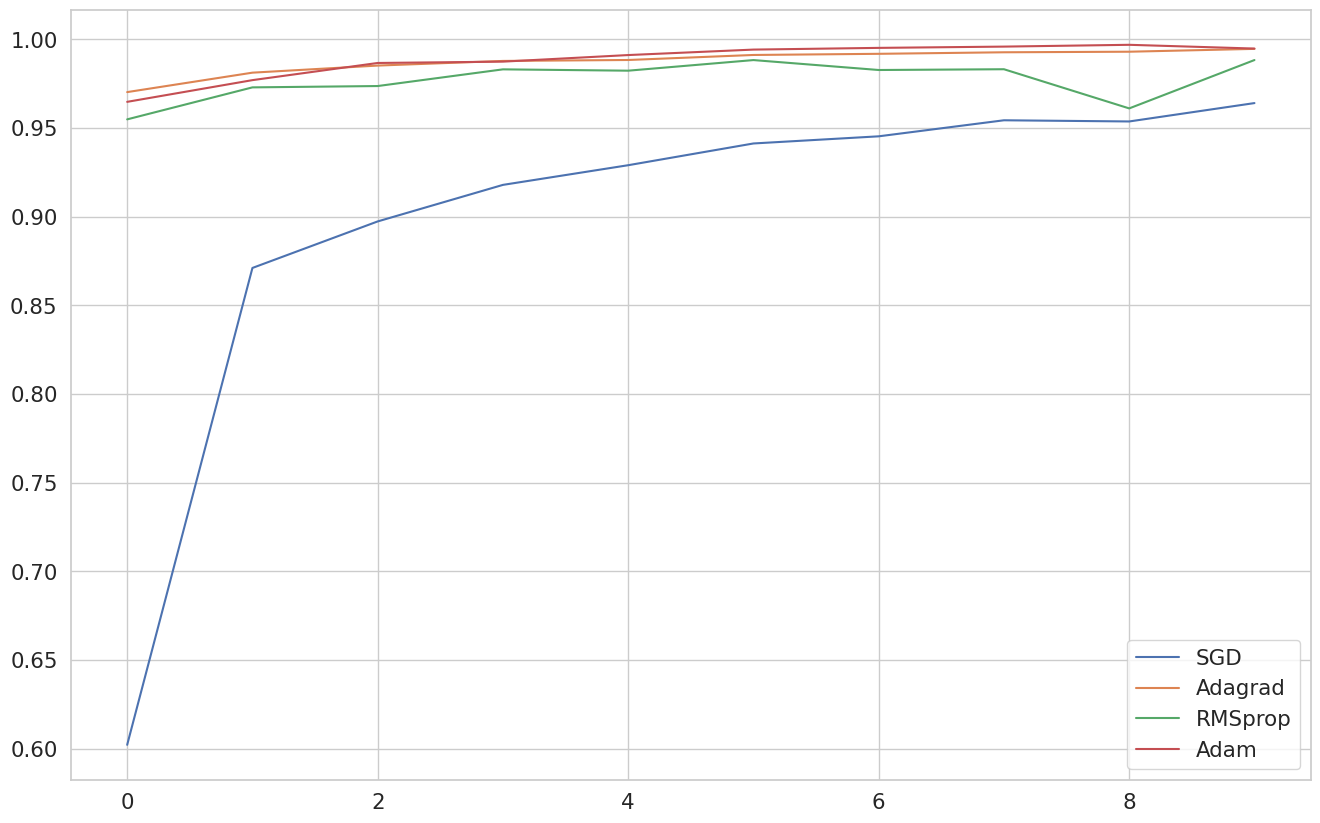

In [35]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize= (16,10))
plt.plot(range(10), SGD_accuracy['valid'], label = 'SGD')
plt.plot(range(10),Adagrad_accuracy['valid'], label = 'Adagrad')
plt.plot(range(10),RMSprop_accuracy['valid'], label = 'RMSprop')
plt.plot(range(10),Adam_accuracy['valid'], label = 'Adam')
plt.legend()
plt.show()

In [55]:
result = {
    'SGD' :SGD_accuracy['valid'][-1],
'Adagrad': Adagrad_accuracy['valid'][-1],
'RMSprop': RMSprop_accuracy['valid'][-1],
'Adam': Adam_accuracy['valid'][-1]
}
sorted(result.items(), key = lambda item: item[1])


[('SGD', 0.9640358475479744),
 ('RMSprop', 0.988306236673774),
 ('Adagrad', 0.9946028784648188),
 ('Adam', 0.9947861140724946)]